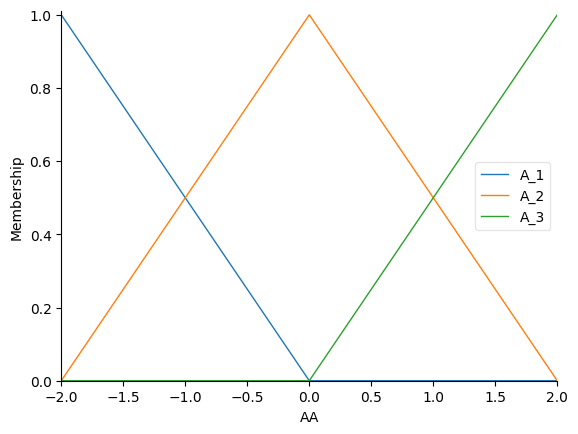

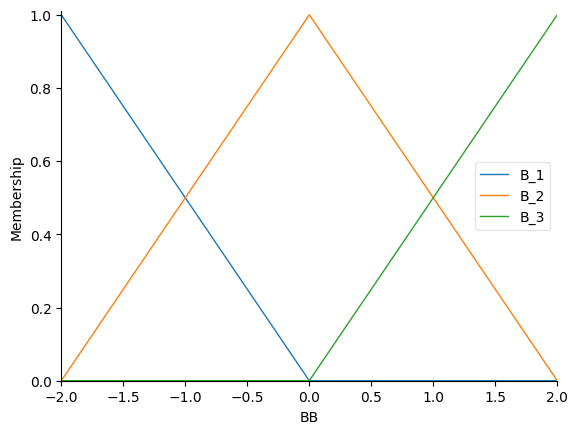

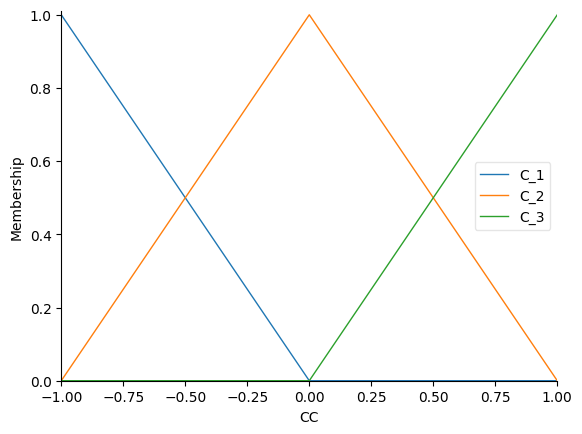

In [33]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

AA = ctrl.Antecedent(np.arange(-2,2.01,0.01), 'AA')
#zad 9
BB = ctrl.Antecedent(np.arange(-2,2.01,0.01), 'BB')

CC = ctrl.Consequent(np.arange(-1,1.01,0.01), 'CC')



AA['A_1'] = fuzz.trapmf(AA.universe, [-5,-4,-2,0])
AA['A_2'] = fuzz.trimf(AA.universe, [-2,0,2])
AA['A_3'] = fuzz.trapmf(AA.universe, [0,2,4,5])


BB['B_1'] = fuzz.trapmf(BB.universe, [-5,-4,-2,0])
BB['B_2'] = fuzz.trimf(BB.universe, [-2,0,2])
BB['B_3'] = fuzz.trapmf(BB.universe, [0,2,4,5])


CC['C_1'] = fuzz.trapmf(CC.universe, [-5,-4,-1,0])
CC['C_2'] = fuzz.trimf(CC.universe, [-1,0,1])
CC['C_3'] = fuzz.trapmf(CC.universe, [0,1,4,5])





AA.view()
BB.view()
CC.view()

regula1 = ctrl.Rule(AA['A_1'] & BB['B_2'], CC['C_1'])
regula2 = ctrl.Rule(AA['A_1'] & BB['B_3'], CC['C_2'] )
regula3 = ctrl.Rule(AA['A_2'] & BB['B_2'], CC['C_2'] )
regula4 = ctrl.Rule(AA['A_2'] & BB['B_3'], CC['C_3'] )

CC_ctr = ctrl.ControlSystem([regula1,regula2,regula3,regula4,])
CC_sym = ctrl.ControlSystemSimulation(CC_ctr)



output:  -0.1312015503875969


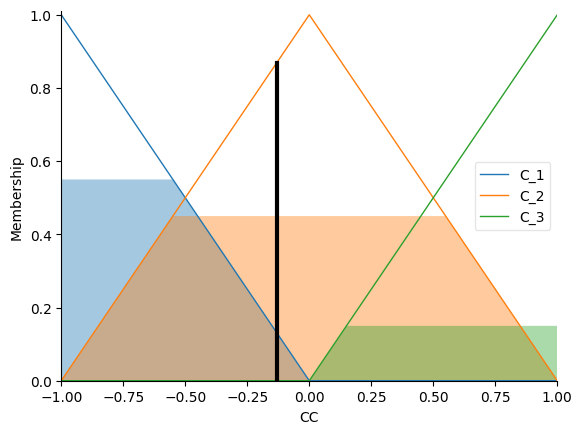

In [34]:
CC_sym.input['AA']= -1.7
CC_sym.input['BB']= 0.9
CC_sym.compute()
print("output: ", CC_sym.output['CC'])
CC.view(sim=CC_sym)

